In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
data1 = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])

In [4]:
for keys in iris.keys() :
    print(keys)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [5]:
X=iris.data
y=iris.target

In [6]:
print(data1.target.value_counts(normalize=True))

0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: target, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
# X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
0# X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=6,train_size=0.8)

In [9]:
print(y_train)

[0 1 0 0 2 2 1 2 1 0 0 2 1 1 0 0 1 0 0 1 2 2 2 0 2 0 0 0 1 2 1 1 1 2 1 1 0
 2 0 0 1 1 2 2 2 1 1 2 2 1 1 0 2 2 0 0 2 2 1 2 1 0 1 2 0 0 2 0 0 0 0 0 0 1
 2 0 2 1 0 2 1 2 1 1 0 1 2 1 0 1 0 0 1 0 1 2 1 2 2 2 1 0 2 0 2 0 1 2 0 1 1
 0 0 1 1 2 1 2 2 2]


In [10]:
print("% Class0",np.count_nonzero(y_train==0)/len(y_train))
print("% Class1",np.count_nonzero(y_train==1)/len(y_train))
print("% Class2",np.count_nonzero(y_train==2)/len(y_train))

% Class0 0.3416666666666667
% Class1 0.3333333333333333
% Class2 0.325


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [12]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(
    X_train,
    y_train
)

KNeighborsClassifier()

In [13]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

K fold cross validation

Split the dataset into K equal partitions (or "folds")
So if k = 5 and dataset has 150 observations
Each of the 5 folds would have 30 observations
Use fold 1 as the testing set and the union of the other folds as the training set
Testing set = 30 observations (fold 1)
Training set = 120 observations (folds 2-5)
Calculate testing accuracy
Repeat steps 2 and 3 K times, using a different fold as the testing set each time
We will repeat the process 5 times
2nd iteration
fold 2 would be the testing set
union of fold 1, 3, 4, and 5 would be the training set
3rd iteration
fold 3 would be the testing set
union of fold 1, 2, 4, and 5 would be the training set
And so on...
Use the average testing accuracy as the estimate of out-of-sample accuracy

In [14]:
from sklearn.model_selection import KFold
kf = KFold( n_splits=5, shuffle=False)


# print the contents of each training and testing set
# ^ - forces the field to be centered within the available space
# .format() - formats the string similar to %s or %n
# enumerate(sequence, start=0) - returns an enumerate object
print('{} {:^61} {}'.format('Iteration', 'Training set obsevations', 'Testing set observations'))
for train, test in kf.split(X):
  print("%s %s" % (train, test))

Iteration                   Training set obsevations                    Testing set observations
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 1

In [15]:
from sklearn.model_selection import cross_val_score


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)


scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [17]:
print(scores.mean())


0.9666666666666668


In [18]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [19]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


Text(0, 0.5, 'Cross-validated accuracy')

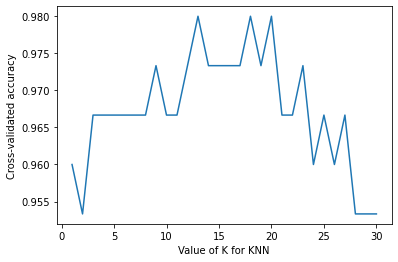

In [20]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9666666666666667

In [22]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.9679633867276888
0.9666666666666667
0.9665141113653699
[1.         0.94736842 0.95652174]


In [24]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

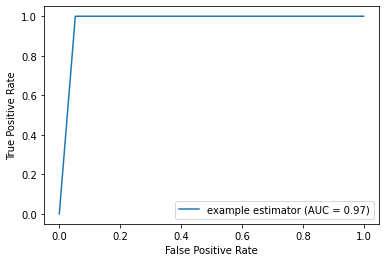

In [25]:
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()